In [1]:
r''' The United States National Weather Service (NWS) allows, for free, 
"developers access to critical forecasts, alerts, and observations, along with other weather data."
you can find the full documentation of their API at: https://www.weather.gov/documentation/services-web-api.

this script attempts to use said access to create a simple weather app'''
import pandas as pd

In [2]:
base_location = "40.10284429898823,-88.23805168679868" # Champaign, IL
def forecast_url(location = base_location):
    '''returns the weather forecast url for the input location as a string'''
    return f"https://api.weather.gov/points/{location}"
def forecast_series(location = base_location):
    '''returns the weather forecast JSON for the input location'''
    url = forecast_url(location)
    return pd.read_json(url, typ = 'series')
def forecast_properties(typ, input):
    '''returns forecast properties for input location or forecast series'''
    if typ == "location":
        return forecast_series(input)["properties"]
    elif typ == "forecast series":
        return input["properties"]
def hourly_forecast_url(typ, input):
    '''returns  the hourly forecast url for input location or forecast series or forecast properties'''
    if typ == "location":
        return forecast_properties("location", input)["forecastHourly"]
    elif typ == "forecast series":
        return forecast_properties("forecast seris", input)["forecastHourly"]
    elif typ == "forecast properties":
        return input["forecastHourly"]
def hourly_forecast_series(typ, input):
    '''returns the weather forecast for various inputs'''
    if typ == "location":
        return pd.read_json(hourly_forecast_url("location", input), typ = 'series')
    elif typ == "forecast series":
        return pd.read_json(hourly_forecast_url("forecast series", input), typ = "series")
    elif typ == "forecast properties":
        return pd.read_json(hourly_forecast_url("forecast properties", input), typ = "series")
    elif typ == "hourly forecast url":
        return pd.read_json(input, typ = "series")
def hourly_forecast_table(typ, input):
    '''returns the hourly weather forecast as a pandas DataFrame for 6.5 days'''
    if typ == "location":
        return pd.DataFrame(hourly_forecast_series("location", input)["properties"]["periods"])
    elif typ == "hourly_forecast_series":
        return pd.DataFrame(input["properties"]["periods"])
base_hourly_forecast_table = hourly_forecast_table("location", base_location)
base_hourly_forecast_table 

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,,2025-07-30T01:00:00-05:00,2025-07-30T02:00:00-05:00,False,76,F,,"{'unitCode': 'wmoUnit:percent', 'value': 2}","{'unitCode': 'wmoUnit:degC', 'value': 23.33333...","{'unitCode': 'wmoUnit:percent', 'value': 95}",1 mph,NNE,https://api.weather.gov/icons/land/night/fog?s...,Patchy Fog,
1,2,,2025-07-30T02:00:00-05:00,2025-07-30T03:00:00-05:00,False,76,F,,"{'unitCode': 'wmoUnit:percent', 'value': 2}","{'unitCode': 'wmoUnit:degC', 'value': 22.77777...","{'unitCode': 'wmoUnit:percent', 'value': 90}",2 mph,NE,https://api.weather.gov/icons/land/night/fog?s...,Patchy Fog,
2,3,,2025-07-30T03:00:00-05:00,2025-07-30T04:00:00-05:00,False,75,F,,"{'unitCode': 'wmoUnit:percent', 'value': 2}","{'unitCode': 'wmoUnit:degC', 'value': 22.22222...","{'unitCode': 'wmoUnit:percent', 'value': 90}",2 mph,NNE,https://api.weather.gov/icons/land/night/fog?s...,Patchy Fog,
3,4,,2025-07-30T04:00:00-05:00,2025-07-30T05:00:00-05:00,False,74,F,,"{'unitCode': 'wmoUnit:percent', 'value': 2}","{'unitCode': 'wmoUnit:degC', 'value': 22.22222...","{'unitCode': 'wmoUnit:percent', 'value': 93}",2 mph,NNE,https://api.weather.gov/icons/land/night/fog?s...,Patchy Fog,
4,5,,2025-07-30T05:00:00-05:00,2025-07-30T06:00:00-05:00,False,74,F,,"{'unitCode': 'wmoUnit:percent', 'value': 3}","{'unitCode': 'wmoUnit:degC', 'value': 21.66666...","{'unitCode': 'wmoUnit:percent', 'value': 90}",2 mph,N,https://api.weather.gov/icons/land/night/fog?s...,Patchy Fog,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,,2025-08-05T08:00:00-05:00,2025-08-05T09:00:00-05:00,True,71,F,,"{'unitCode': 'wmoUnit:percent', 'value': 22}","{'unitCode': 'wmoUnit:degC', 'value': 19.44444...","{'unitCode': 'wmoUnit:percent', 'value': 87}",6 mph,SSE,https://api.weather.gov/icons/land/day/tsra_hi...,Slight Chance Showers And Thunderstorms,
152,153,,2025-08-05T09:00:00-05:00,2025-08-05T10:00:00-05:00,True,74,F,,"{'unitCode': 'wmoUnit:percent', 'value': 22}","{'unitCode': 'wmoUnit:degC', 'value': 20.55555...","{'unitCode': 'wmoUnit:percent', 'value': 84}",6 mph,S,https://api.weather.gov/icons/land/day/tsra_hi...,Slight Chance Showers And Thunderstorms,
153,154,,2025-08-05T10:00:00-05:00,2025-08-05T11:00:00-05:00,True,77,F,,"{'unitCode': 'wmoUnit:percent', 'value': 22}","{'unitCode': 'wmoUnit:degC', 'value': 21.11111...","{'unitCode': 'wmoUnit:percent', 'value': 79}",6 mph,S,https://api.weather.gov/icons/land/day/tsra_hi...,Slight Chance Showers And Thunderstorms,
154,155,,2025-08-05T11:00:00-05:00,2025-08-05T12:00:00-05:00,True,79,F,,"{'unitCode': 'wmoUnit:percent', 'value': 22}","{'unitCode': 'wmoUnit:degC', 'value': 21.66666...","{'unitCode': 'wmoUnit:percent', 'value': 77}",6 mph,S,https://api.weather.gov/icons/land/day/tsra_hi...,Slight Chance Showers And Thunderstorms,


In [3]:
base_hourly_forecast_table["shortForecast"].value_counts()

shortForecast
Sunny                                      36
Mostly Clear                               32
Slight Chance Showers And Thunderstorms    24
Chance Showers And Thunderstorms           18
Showers And Thunderstorms Likely           12
Partly Cloudy                              12
Mostly Sunny                               11
Patchy Fog                                  6
Mostly Cloudy                               3
Partly Sunny                                2
Name: count, dtype: int64

<Axes: title={'center': 'Predicted Temprature In Champaign, IL Vs Time From Now'}, xlabel='Hours from now', ylabel='Temperature (F)'>

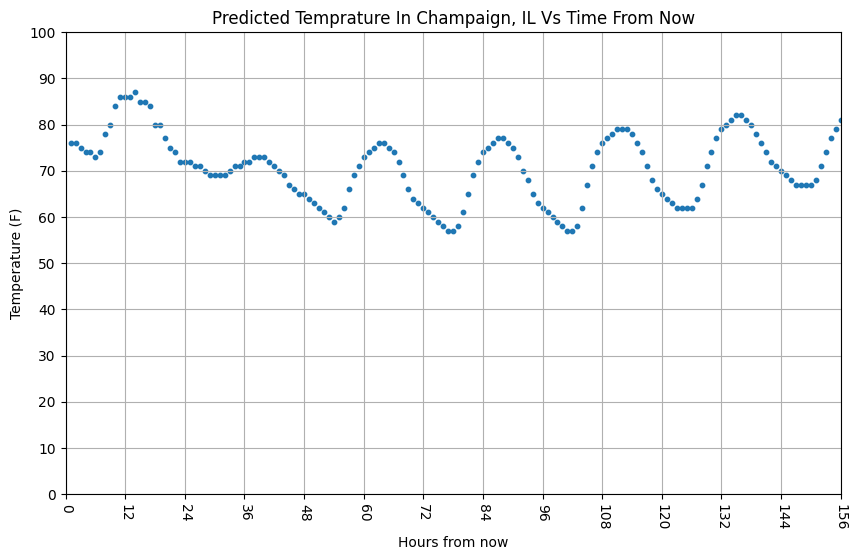

In [4]:
ax = base_hourly_forecast_table.plot.scatter(x = "number", y = "temperature",s=10, figsize=(10,6))
ax.set_xlabel("Hours from now")
ax.set_xlim(0,156)
ax.set_xticks(range(0,157,12))
ax.set_xticklabels(range(0,157,12), rotation = -90)
ax.set_ylabel("Temperature (F)")
ax.set_ylim(0,100)
ax.set_yticks(range(0,101,10))
ax.set_title("Predicted Temprature In Champaign, IL Vs Time From Now")
ax.grid(True)
ax